# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Читаем файл. Из-за "слипшихся" значений добавляем разделитель колонок **sep = '\t'**.

Вывод первых 5 строк:

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Последние 5 строк:

In [3]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


И 5 рандомных строк:

In [4]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23466,15,11900000.0,80.0,2017-08-16T00:00:00,2,NaN,5.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,36813.0,8572.0,1.0,2467.0,3.0,214.0,116.0
22731,7,2950000.0,64.0,2018-02-25T00:00:00,3,2.50,5.0,45.0,4,False,...,7.0,4.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,182.0
9837,17,4300000.0,36.0,2019-02-26T00:00:00,1,NaN,12.0,21.0,9,NaN,...,7.0,NaN,Санкт-Петербург,41844.0,14347.0,1.0,308.0,0.0,NaN,NaN
7696,11,5700000.0,63.5,2018-06-17T00:00:00,2,4.00,5.0,NaN,5,NaN,...,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
16724,4,32000000.0,235.0,2015-06-02T00:00:00,5,3.75,5.0,160.0,3,NaN,...,23.0,4.0,Санкт-Петербург,24188.0,3755.0,0.0,NaN,3.0,568.0,1275.0


Получим краткую информацию о данных:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

`days_exposition`, `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000` нам не подходят в вещественном формате, позже сведём к целочисленному.

И ещё подумаем над преобразованием `last_price` к целочисленному типу.

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Оценим количество пропущенных значений:

In [7]:
%matplotlib inline

In [8]:
df.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

На первый вгляд много, но масштаб до конца непонятен.

Пересчитаем количество пропусков в процентном соотношении:

In [9]:
(df.isnull().mean() * 100).round(2).sort_values(ascending = False)

is_apartment            88.29
parks_nearest           65.91
ponds_nearest           61.56
balcony                 48.61
ceiling_height          38.80
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
ponds_around3000        23.28
days_exposition         13.42
kitchen_area             9.61
living_area              8.03
floors_total             0.36
locality_name            0.21
first_day_exposition     0.00
last_price               0.00
total_area               0.00
studio                   0.00
rooms                    0.00
floor                    0.00
open_plan                0.00
total_images             0.00
dtype: float64

Количество дубликатов до обработки данных:

In [10]:
df.duplicated().sum()

0

Изучим названия населённых пунктов, в них могут скрываться неочевидные дубликаты:

In [11]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [12]:
len(df['locality_name'].sort_values().unique())

365

Целых 365 уникальных значений!

Видно, что проблемы с буквой ё: где-то могут совпасть поселок *название* и посёлок *название*.

Также присутствуют населённые пункты, обозначенные как деревня *название* и *название*.

Такие экземпляры нужно сливать в единый.

### Вывод

Данные: 22 колонки с признаками и 23699 строк

- Очень много пропусков, особенно в `is_apartament`.

- Дубликаты не обнаружены, но это нужно будет проверить ещё раз после обработки данных.

- Населённые пункты: встречаются дубли из-за е и ё, названия с *деревня* <название> и без. Нужно разбираться с этим.

- Необходимо преобразование в целочисленный формат для `days_exposition`, `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000`. Такие данные не измеряются дробными числами

- Расстояния можно перевести в километры, а цену – в миллионы

- Из `first_day_exposition` нам не понадобится время, поэтому можно будет преобразовать к формату %Y-%m-%d.

- В `describe()`  были обнаружены странные значения вроде высоты потолков 1м или количество комнат: 0. 1580 дней с выставления объявления - это тоже очень много.

### Шаг 2. Предобработка данных

### Заполнение пропусков
#### Балконы

Заполним пропуски в `balcony` нулём.

Видимо, этот пропуск появился благодаря пользователям без балкона, которые решили не сообщать о том, что у них целых 0 балконов.

In [13]:
df[df['balcony'] == 0]['balcony'].count()

3758

Хотя известно, что 3758 человек всё же заполнили информацию о **0** балконов.

In [14]:
df['balcony'] = df['balcony'].fillna(0)

Проверяем:

In [15]:
df['balcony'].isna().sum()

0

____
#### Количество этажей
Аналогично можно было предположить, что незаполнение `floors_total` означает, что это однаэтажные дома.

Однако по строкам с пропущенными значениями видно, что `floor` в большинстве случаев отнюдь не 1.

In [16]:
df[df['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Заполним пропуски номером этажа, на котором находится жильё. 

Как будто он последний.

In [17]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

Проверка:

In [18]:
df['floors_total'].isna().sum()

0

### Обработка данных
#### Названия населённых пунктов
Мурино и Кудрово – города в Ленинградской области. Дополнение 'деревня' к ним неактуально.

Так же надо заменить посЁлки на посЕлки
___

Для этого я написала функцию:

она ищет Мурино и Кудрово и возвращает только эти названия, даже если к ним приписано 'деревня'.

посЁлки выкидываются и заменяются на посЕлки и складываются со второй частью – его названием.

try–except для того, чтобы избегать пока не заполненные пропуски.

In [19]:
def locality_names(name):
    try:
        if 'Кудрово' in name:
            name = 'Кудрово'
        elif 'Мурино' in name:
            name = 'Мурино'
        elif 'городской посёлок' in name:
            name1 = name[17:]
            name = 'городской поселок' + name1
        elif 'коттеджный посёлок' in name:
            name1 = name[18:]
            name = 'коттеджный поселок' + name1
        elif 'посёлок' in name:
            name1 = name[7:]
            name = 'поселок' + name1
        return name
    except:
        return name

Проверим функцию:

In [20]:
locality_names('городской посёлок поселочек')

'городской поселок поселочек'

In [21]:
df['locality_name'] = df['locality_name'].apply(locality_names)

In [22]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фёд

In [23]:
len(df['locality_name'].sort_values().unique())

329

Интересно, *коттеджный поселок Лесное* и *поселок Лесное* – это одно и то же?

Тем не менее количество уникальных значений сократилось на 36 штук, это неплохой результат.

___________
Проверим, не появились ли дубликаты:

In [24]:
df.duplicated().sum()

0

Дубликатов не оказалось.

Посмотрим на населённые пункты более внимательно: выведем топ-10 от всего списка

In [25]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
Мурино                 590
Кудрово                472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

топ-10 с конца: неудивительно, что там всего лишь по одному объявлению

In [26]:
df['locality_name'].value_counts().tail(10)

поселок при железнодорожной станции Приветнинское    1
деревня Чудской Бор                                  1
деревня Сижно                                        1
поселок Жилпосёлок                                   1
поселок Высокоключевой                               1
поселок городского типа Кондратьево                  1
деревня Иссад                                        1
поселок Шугозеро                                     1
деревня Ялгино                                       1
деревня Большое Рейзино                              1
Name: locality_name, dtype: int64

___
#### Обработка пропусков в жилой площади

Исходя из логики, у студий средняя площадь всегда меньше. 

Проверим по нашему датасету:

In [27]:
df[df['studio'] == 1]['living_area'].describe()

count    139.000000
mean      18.995396
std        7.345598
min        2.000000
25%       16.000000
50%       18.000000
75%       19.850000
max       68.000000
Name: living_area, dtype: float64

In [28]:
df[df['studio'] == 0]['living_area'].describe()

count    21657.000000
mean        34.557094
std         22.058273
min          2.000000
25%         18.700000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

Так и есть. У студий площадь почти вполовину меньше, чем у нестудий.

Так же есть различие жилой/нежилой фонд: в жилом фонде средняя площадь чуть меньше

In [29]:
df[df['is_apartment'] == 0]['living_area'].describe()

count    2613.000000
mean       35.026973
std        19.939367
min        10.000000
25%        19.000000
50%        31.000000
75%        43.000000
max       204.000000
Name: living_area, dtype: float64

In [30]:
df[df['is_apartment'] == 1]['living_area'].describe()

count     42.000000
mean      47.979524
std       49.462974
min       13.920000
25%       20.422500
50%       33.250000
75%       55.700000
max      301.500000
Name: living_area, dtype: float64

Так же есть сочетания с пропусками жилой площади жилой фонд/не студия, нежилой фонд/не студия.

Бережно и внимательно заполним их:

In [31]:
df.query('is_apartment == 0 and studio == 0')['living_area'].isna().sum()

112

In [32]:
df.query('is_apartment == 0 and studio == 1')['living_area'].isna().sum()

0

In [33]:
df.loc[(df["is_apartment"] == 1) & (df["studio"] == 0)]['living_area'].isna().sum()

8

In [34]:
df.query('is_apartment == 1 and studio == 1')['living_area'].isna().sum()

0

In [35]:
mask10 = (df["is_apartment"] == 1) & (df["studio"] == 0)
median10 = df.loc[mask10, 'living_area'].median()
df.loc[mask10, 'living_area'] = df.loc[mask10, 'living_area'].fillna(median10)

In [36]:
mask00 = (df["is_apartment"] == 0) & (df["studio"] == 0)
median00 = df.loc[mask00, 'living_area'].median()
df.loc[mask00, 'living_area'] = df.loc[mask00, 'living_area'].fillna(median00)

Проверим, сколько пропущенных значений `living_area` осталось:

In [37]:
df['living_area'].isnull().sum()

1783

Немногим меньше. 

Оставшиеся пропуски заполним по принципу **студия / не студия**, к тому же пропусков в `studio` совсем нет:

In [38]:
mask_is_studio = (df["studio"] == 1)
median_is_studio = df.loc[mask_is_studio, 'living_area'].median()
df.loc[mask_is_studio, 'living_area'] = df.loc[mask_is_studio, 'living_area'].fillna(median_is_studio)

In [39]:
mask_not_studio = (df["studio"] == 0)
median_not_studio = df.loc[mask_not_studio, 'living_area'].median()
df.loc[mask_not_studio, 'living_area'] = df.loc[mask_not_studio, 'living_area'].fillna(median_not_studio)

Проверим, сколько пропусков после заполнения:

In [40]:
df['living_area'].isnull().sum()

0

Проверим, не создалось ли таких экземпляров, где `living_area` больше `total_area`

In [41]:
mask_area = (df['living_area'])>(df['total_area'])
df.loc[mask_area]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
322,6,2000000.0,25.0,2017-02-07T00:00:00,1,NaN,5.0,31.0,5,False,...,NaN,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
546,0,6000001.0,25.0,2018-11-16T00:00:00,1,3.00,5.0,31.0,5,False,...,NaN,0.0,Санкт-Петербург,25169.0,3871.0,1.0,207.0,1.0,776.0,17.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,NaN,18.0,30.0,8,NaN,...,NaN,1.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,31.0,1,False,...,NaN,0.0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1116,12,3490000.0,29.0,2017-10-21T00:00:00,1,2.50,9.0,30.0,6,NaN,...,NaN,0.0,Санкт-Петербург,45501.0,18226.0,0.0,NaN,0.0,NaN,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21718,11,2540000.0,23.0,2018-03-22T00:00:00,1,NaN,5.0,30.0,1,NaN,...,NaN,0.0,Санкт-Петербург,27289.0,7997.0,0.0,NaN,1.0,698.0,45.0
22356,6,2050000.0,17.2,2019-01-13T00:00:00,1,2.77,23.0,31.0,1,False,...,NaN,0.0,Санкт-Петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7.0
22661,6,3150000.0,24.0,2019-04-16T00:00:00,1,NaN,5.0,30.0,3,NaN,...,NaN,0.0,Санкт-Петербург,26737.0,5235.0,1.0,359.0,1.0,964.0,NaN
22839,14,3350000.0,27.0,2018-11-03T00:00:00,1,2.70,16.0,31.0,6,False,...,4.0,2.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0


Создалось целых 73 штуки.

Обновим `total_area` = `living_area`

In [42]:
df.loc[mask_area, 'total_area'] = df.loc[mask_area, 'living_area']

___
#### Количество дней, с того момента, как выложили объявление
Заполним пропуски в `days_exposition`.

Похоже, что эти пропуски появились по вине разработчиков портала, т.к. точно известен день, когда выложили объявление.

Данные, когда объявление сняли, видимо, не подтянулись.

Т.к. данных, по которым можно сделать какое-либо предположение по количеству дней, у нас нет, заполним пропуски в этом столбце медианным значением:

In [43]:
df.loc[df['days_exposition'].isnull(), 'days_exposition'] = df['days_exposition'].median()

Проверим, получилось ли заполнить все пропуски:

In [44]:
df['days_exposition'].isnull().sum()

0

___
#### `airports_nearest` и `cityCenters_nearest`
Заполним пропуски в `airports_nearest` и `cityCenters_nearest`, исходя из данных в населённых пунктах, в которых эти столбцы заполнены:

In [45]:
median_data = df.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)
median_data

,airports_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25715.5,29140.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Мурино,51553.0,21888.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27930.5


In [46]:
def fill_missing_data(row, col):
    locality = row['locality_name']
    
    if locality in median_data.index:
        return median_data.loc[locality][col]
    
    return row[col]

In [47]:
cols = ['airports_nearest', 'cityCenters_nearest']

for col in cols:
    df.loc[df[col].isnull(), col] = df.apply(fill_missing_data, axis=1, args=(col,))

Сколько пропусков осталось:

In [48]:
df['cityCenters_nearest'].isnull().sum()

4838

Во скольких населённых пунктах:

In [49]:
len(df[df['cityCenters_nearest'].isnull()]['locality_name'].unique())

302

#### Приведение к целочисленному формату

In [50]:
# float63 -> int64

list_of_cols_to_int = ['balcony', 'floors_total', 'days_exposition']

for col in list_of_cols_to_int:
    df[col] = df[col].astype('int')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18861 non-null float64
cityCenters_nearest     18861 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000   

Переведём цену в миллионы:

In [52]:
df['last_price'] = df['last_price'] / 10**6

In [53]:
df['last_price'] = df['last_price'].round(3)

### Шаг 3. Посчитайте и добавьте в таблицу

#### Стоимость квадратного метра

$$square\_meter\_price = \frac{last\_price}{total\_area}$$

In [54]:
df['square_meter_price'] = df['last_price'] / df['total_area']

#### День недели, месяц и год публикации объявления.

Сначала приведем `first_day_exposition`  к формату %Y-%m-%d:

In [55]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [56]:
df['day_exposition'] = df['first_day_exposition'].dt.dayofweek
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Функция для категоризации этажа:

In [57]:
def cat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [58]:
df['floor'] = df.apply(cat_floor, axis=1)

Cоотношение жилой и общей площади:

In [59]:
df['living_total_ratio'] = df['living_area'] / df['total_area']

Отношение площади кухни к общей:

In [60]:
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']

Посмотрим на добавленные столбцы:

In [61]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,living_total_ratio,kitchen_total_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,другой,NaN,...,482.0,2.0,755.0,95,0.120370,3,3,2019,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.6,первый,NaN,...,NaN,0.0,NaN,81,0.082921,1,12,2018,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.3,другой,NaN,...,90.0,2.0,574.0,558,0.092786,3,8,2015,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,NaN,14,30.0,другой,NaN,...,84.0,3.0,234.0,424,0.408176,4,7,2015,0.188679,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,другой,NaN,...,112.0,1.0,48.0,121,0.100000,1,6,2018,0.320000,0.410000


#### Категория СПб / не СПб

In [62]:
def cat_spb(name):
    if name == 'Санкт-Петербург':
        return True
    return  False

In [63]:
df['is_spb'] = df['locality_name'].apply(cat_spb)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,living_total_ratio,kitchen_total_ratio,is_spb
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,другой,NaN,...,2.0,755.0,95,0.120370,3,3,2019,0.472222,0.231481,True
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.6,первый,NaN,...,0.0,NaN,81,0.082921,1,12,2018,0.460396,0.272277,False
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.3,другой,NaN,...,2.0,574.0,558,0.092786,3,8,2015,0.612500,0.148214,True
3,0,64.900,159.0,2015-07-24,3,NaN,14,30.0,другой,NaN,...,3.0,234.0,424,0.408176,4,7,2015,0.188679,NaN,True
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,другой,NaN,...,1.0,48.0,121,0.100000,1,6,2018,0.320000,0.410000,True


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

Построим гистограммы для каждого параметра.

#### Площадь

In [64]:
df['total_area'].describe()

count    23699.000000
mean        60.365683
std         35.637640
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

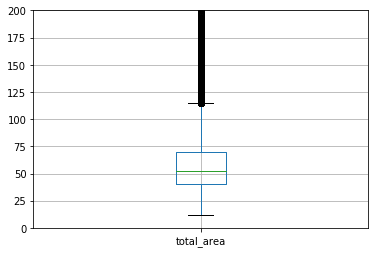

In [65]:
plt.plot(figsize=(5,10))
plt.ylim(0, 200)
df.boxplot('total_area')
plt.show()

Большая часть значений лежит в диапазоне до 70 кв.м., что выглядит правдаподобно.

Нижний "ус" упирается в ~12, минимальное значение. 

Верхний "ус" упирается в 115 кв.м.

Все, что лежит за ориентировочной границей нормального размаха, считаем выбросом.

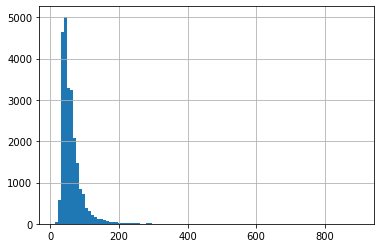

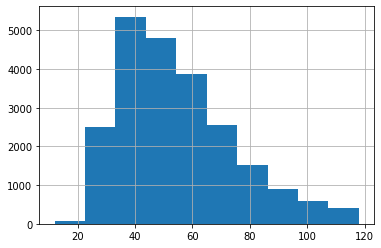

In [66]:
# грязные данные
df['total_area'].hist(bins=100)
plt.show()

# данные без выбросов и ошибок
df.query('total_area >= 12 and total_area <= 118')['total_area'].hist()
plt.show()

#фильтр данных
total_area_query = 'total_area >= 12 and total_area <= 118'

**Цена**

In [67]:
df['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

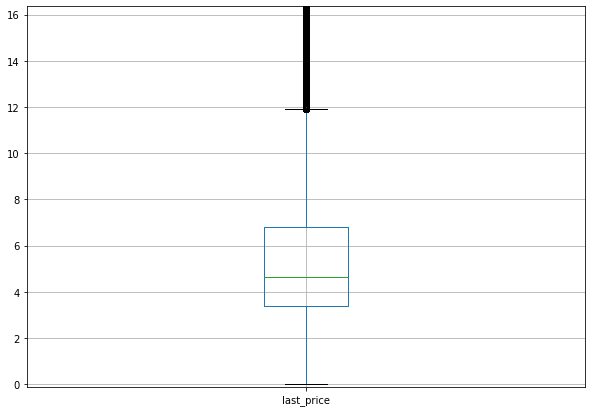

In [68]:
plot = df.boxplot('last_price', figsize=(10,7))
plot.set_ylim(-df['last_price'].min()*10,df['last_price'].mean()*2.5)
plot

Большинство значений укладывается до 7 млн, а средняя цена около 6.5 млн, это выглядит правдоподобно.

Однако минимальная цена составляет 12190 рублей, куда и упирается нижний "ус ящика".


Сравним  цены на жильё в СПб и не в СПб:

По логике вещей в СПб цены должны быть выше.

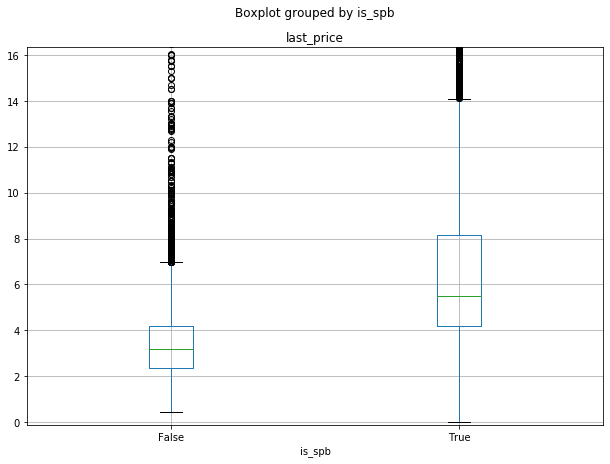

In [69]:
plot = df.boxplot('last_price', by='is_spb', figsize=(10,7))
plot.set_ylim(-df['last_price'].min()*10,df['last_price'].mean()*2.5)
plot

Цены в Санкт-Петербурге действительно выше, как и средняя цена.

Но, судя по всему, самая маленькая цена тоже оказалась в Санкт-Петербурге.

Отсеим подобные экземпляры с подозрительно низкой ценой, например, до 500 тыс.

In [70]:
df_cheapest = df.query('last_price < 0.5')
df_cheapest.sort_values('last_price').head(10)[['locality_name', 'last_price', 'total_area', 'square_meter_price']]

,locality_name,last_price,total_area,square_meter_price
8793,Санкт-Петербург,0.012,109.0,0.000110
14911,поселок станции Свирь,0.430,54.0,0.007963
17456,Сланцы,0.430,30.4,0.014145
16274,деревня Старополье,0.440,40.0,0.011000
5698,городской поселок Будогощь,0.450,42.0,0.010714
9581,деревня Старополье,0.450,43.4,0.010369
16219,деревня Вахнова Кара,0.450,38.5,0.011688
17676,деревня Ям-Тесово,0.450,36.5,0.012329
18867,деревня Выскатка,0.470,41.0,0.011463
21912,поселок Совхозный,0.470,37.0,0.012703


112 рублей за метр, да ещё и в Петербурге - фантастика!

Пусть нижней границей выбросов станут Сланцы, потому что 4,4 млн - уже достаточно правдоподобная цена для жилья в деревне.

Верхний ус вне Спб заканчивается на 7 млн, в то время как в Спб – на 14 млн.

В общих данных верхняя граница - 12 млн.

Опустим это сверхдорогое жилье, дворцы и замки.

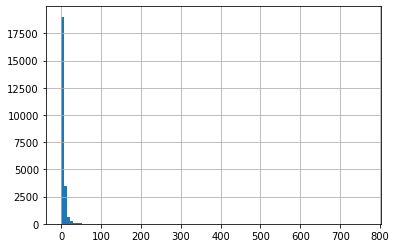

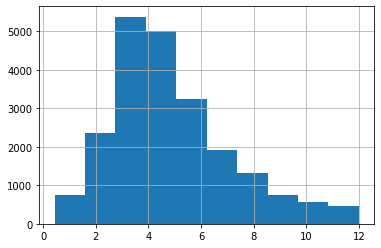

In [71]:
# грязные данные
df['last_price'].hist(bins=100)
plt.show()

# данные без выбросов
df.query('last_price >= 0.43 and last_price <= 12')['last_price'].hist()
plt.show()

# фильтр данных
last_price_query = 'last_price >= 0.43 and last_price <= 12'

Визуально данные без выбросов похожи на распределение Пуассона :)

#### Число комнат

In [72]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

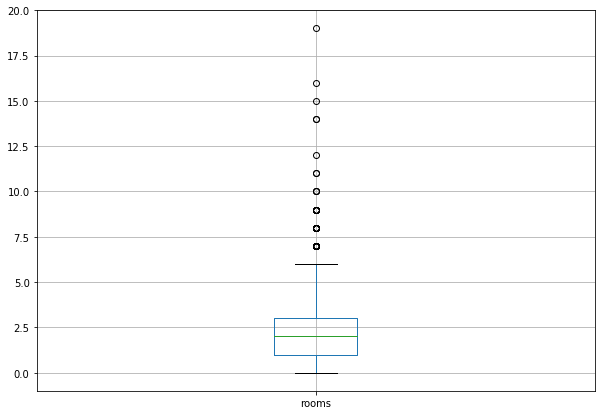

In [73]:
plot = df.boxplot('rooms', figsize=(10,7))
plot.set_ylim(-1,df['rooms'].max()+1)
plot

Большая часть значений лежит в диапазоне до 3х комнат. Это достаточно правдоподобно.

Нижний "ус" упирается в 0, что является минимальным значением. Это ошибка в данных, даже в студиях есть 1 комната.

Верхний "ус" упирается в 6.

Выбросами посчитаем всё то, что лежит за границей.

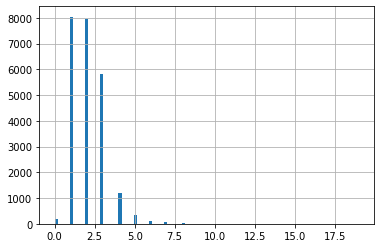

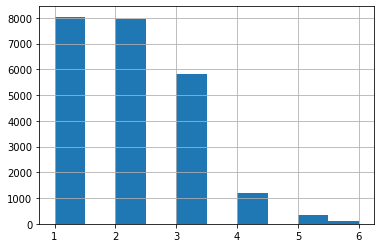

In [74]:
# грязные данные
df['rooms'].hist(bins=100)
plt.show()

# данные без выбросов
df.query('rooms >= 1 and rooms<= 6')['rooms'].hist()
plt.show()

# фильтр данных
rooms_query = 'rooms >= 1 and rooms<= 6'

Видно, что самые частые варианты – однушки и двушки. Иногда трёшки.

И совсем иногда четверёшки.

#### Высота потолков

In [75]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

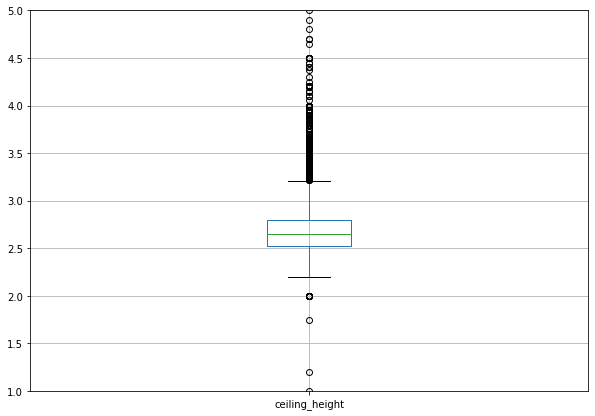

In [76]:
plot = df.boxplot('ceiling_height', figsize=(10,7))
plot.set_ylim(1,df['ceiling_height'].max()/20)
plot

бОльшая часть значений меньше 2.75-2.8, что, в принципе, нормально.

Нижний "ус" упирается в 2.2 метра, это очень странно, потому что известно, что нормативы снип для Ленинградской области по высоте потолков - 2.5 метра.

Верхний "ус" упирается в 3.2 метра. Приемлемо.

Будем считать выбросами всё, меньше 2.5 и больше 3.2 метров.

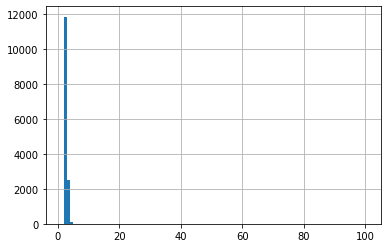

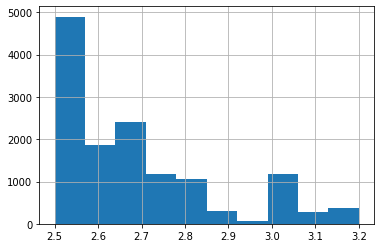

In [77]:
# грязные данные
df['ceiling_height'].hist(bins=100)
plt.show()

# данные без выбросов
df.query('ceiling_height >= 2.5 and ceiling_height <= 3.2')['ceiling_height'].hist()
plt.show()

# фильтр данных
ceiling_height_query = 'ceiling_height >= 2.5 and ceiling_height <= 3.2'

Любопытно, что в гистограмме с чистыми данными наблюдаются скачки.

Вероятно, это "типовые" дома с одинаковыми потолками или просто стандартные размеры для застройщиков.

#### Время продажи квартиры

In [78]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

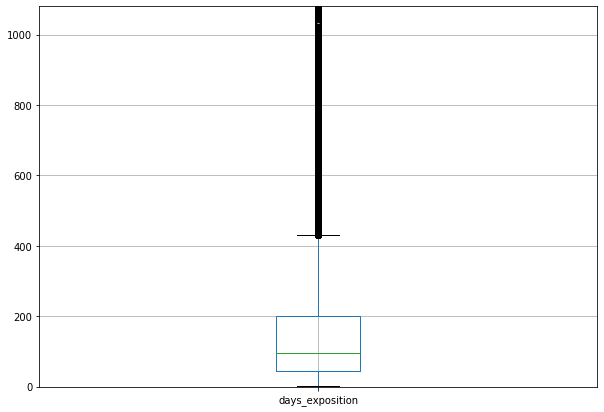

In [79]:
plot = df.boxplot('days_exposition', figsize=(10,7))
plot.set_ylim(-1,df['days_exposition'].max()-500)
plot

Большая часть значений лежит в диапазоне от 30 до 200 дней, что выглядит правдоподобно. Если на Новый год загадать "продать квартиру", то вполне вероятно, что желание успеет исполниться.

Первый квартиль лежит на уровне 45 дней.

Нижний "ус" упирается в 1 день, что является минимальным значением. Продать квартиру за 1 день - об этом мечтают многие, но до конца неизвестно, насколько это реально.

Верхний "ус" упирается в 430 дней. Всё, что больше - очень долго, почти полтора года.

В среднем объявление о продаже висит около 100 дней.

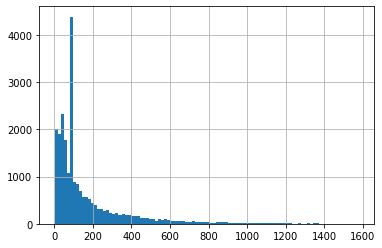

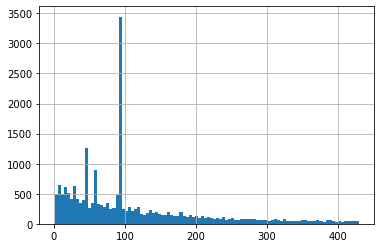

In [80]:
# грязные данные
df['days_exposition'].hist(bins=100)
plt.show()

# данные без выбросов
df.query('days_exposition >= 1 and days_exposition <= 430')['days_exposition'].hist(bins=100)
plt.show()

# фильтр данных
days_exposition_query = 'days_exposition >= 1 and days_exposition <= 430'

### Факторы, влияющие на стоимость квартиры 
#### Зависимость цены от площади, числа комнат, удалённости от центра

Воспользуемся заранее подготовленными фильтрами данных `last_price_query`, `total_area_query`, `rooms_query`

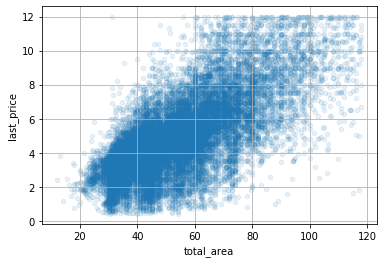

In [81]:
# зависимость цены от площади недвижимости

price_area_query = total_area_query + ' and ' + last_price_query
price_area_data = df.query(price_area_query)

price_area_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.grid(True)
plt.show()

In [82]:
# корреляция
price_area_data['total_area'].corr(price_area_data['last_price'])

0.7016624391664827

По графику и значению корреляции видно, что взаимосвязь между площадью квартиры и её стоимостью есть.

Больше площадь – выше цена.
___

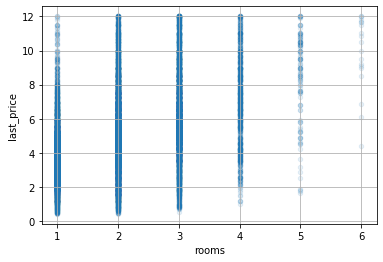

In [83]:
# зависимость цены от количества комнат

price_rooms_query = rooms_query + ' and ' + last_price_query
price_rooms_data = df.query(price_rooms_query)

price_rooms_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1)
plt.grid(True)
plt.show()

In [84]:
# корреляция
price_rooms_data['rooms'].corr(price_rooms_data['last_price'])

0.45206222525603484

График и значение корреляции свидетельствуют о том, что зависимость цены от количества комнат достаточно слабая.

Всё так же очевидно, что покупка очень дорогой однушки случается так же редко, как и покупка очень дешёвой четырёхкомнатной квартиры.
___

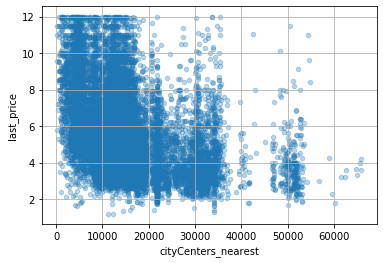

In [85]:
# зависимость цены от удалённости от центра

last_price_data = df.query(last_price_query)

last_price_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.grid(True)
plt.show()

Чем ближе к центру – тем дороже.

График чем-то похож на экспоненту с отрицательным показателем. И странными выбросами в районе 30000 и 50000

In [86]:
# корреляция
last_price_data['cityCenters_nearest'].corr(last_price_data['last_price'])

-0.36460853407630117

Коэффициент корреляции подтверждает слабую взаимосвязь того, что чем ближе к центру – тем дороже.

К тому же, наверняка там расположены многокомнатные квартиры и элитное жилье.
___

In [87]:
# зависимость цены от этажа

df[['floor', 'last_price']].query(last_price_query).pivot_table(index='floor', values='last_price', aggfunc='median')

,last_price
floor,
другой,4.60
первый,3.82
последний,4.10


На первом дешевше всего, там иногда и решётки на окна ставить надо.

Последний – тоже на любителя, но таких любителей больше, чем на первом этаже и цена выше.

Для большинства оптимальным вариантом является что-то между первым и последним этажом. Отсюда высокий спрос и рост цены.
___

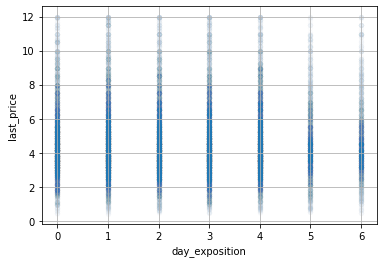

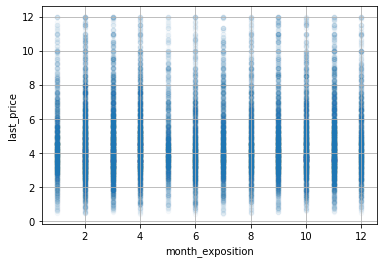

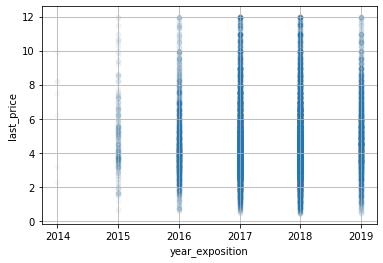

In [88]:
# зависимость цены от дня недели, месяца, года публикации объявления

days_exposition_data = df.query(days_exposition_query + ' and ' + last_price_query)

days_exposition_data.plot(x='day_exposition', y='last_price', kind='scatter', alpha=0.01)
plt.grid(True)
plt.show()

days_exposition_data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.03)
plt.grid(True)
plt.show()

days_exposition_data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.03)
plt.grid(True)
plt.show()

In [89]:
days_exposition_data[['day_exposition', 'month_exposition', 'year_exposition', 'last_price']].corr()

,day_exposition,month_exposition,year_exposition,last_price
day_exposition,1.000000,0.012449,-0.013935,-0.013260
month_exposition,0.012449,1.000000,-0.307590,0.002603
year_exposition,-0.013935,-0.307590,1.000000,0.027958
last_price,-0.013260,0.002603,0.027958,1.000000


Дни: дорогую недвижимость меньше покупают по выходным(?)

Месяцы: нет очевидной взаимосвязи

Года: видимо, портал Я.Недвидимость появился в 2014 году, с каждым годом про него больше знают и больше объявлений публикуют, но с ценой недвижимости это никак не связано

Коэффициенты корреляции говорят о том, что взаимосвязи между днем/месяцем/годом публикации и ценой практически нет. 

То маленькое значение (0.03) для года/цены  можно соотнести с инфляцией.
___

### Топ - 10 населённых пунктов с наибольшим числом объявлений

In [90]:
top_10 = df['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      15721
Мурино                 590
Кудрово                472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

Создадим отдельный список с названиями, он пригодится чуть позже:

In [91]:
top_10_names = list(top_10.index)
top_10_names

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'Выборг']

Средняя цена квадратного метра в топ-10 населенных пунктов:

In [92]:
(df.query('locality_name in @top_10_names and ' + last_price_query)
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean')
    .sort_values(by='square_meter_price', ascending=False)
)

,square_meter_price
locality_name,
Санкт-Петербург,0.105556
Пушкин,0.100323
Кудрово,0.095079
поселок Парголово,0.090176
Мурино,0.085902
поселок Шушары,0.078664
Колпино,0.075186
Гатчина,0.068422
Всеволожск,0.067185


**Вывод:** самая высокая стоимость за квадратный метр – в Санкт-Петербурге, самая низкая – в Выборге.

___

### Квартиры в Санкт-Петербурге: определяем центральную зону

Соберём отдельный датафрейм из недвижимости в Петербурге:

In [93]:
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']
df_spb = df_spb.reset_index()
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15721 entries, 0 to 15720
Data columns (total 30 columns):
index                   15721 non-null int64
total_images            15721 non-null int64
last_price              15721 non-null float64
total_area              15721 non-null float64
first_day_exposition    15721 non-null datetime64[ns]
rooms                   15721 non-null int64
ceiling_height          10104 non-null float64
floors_total            15721 non-null int64
living_area             15721 non-null float64
floor                   15721 non-null object
is_apartment            1833 non-null object
studio                  15721 non-null bool
open_plan               15721 non-null bool
kitchen_area            14342 non-null float64
balcony                 15721 non-null int64
locality_name           15721 non-null object
airports_nearest        15721 non-null float64
cityCenters_nearest     15721 non-null float64
parks_around3000        15660 non-null float64
parks_neare

15721 экземпляр. 

округлим `cityCenters_nearest` до км для удобства:

In [94]:
df_spb['cityCenters_nearest'] = (df_spb['cityCenters_nearest']/1000.).astype(int)
df_spb['cityCenters_nearest'].head()

0    16
1    13
2     6
3     8
4    11
Name: cityCenters_nearest, dtype: int64

Средняя цена для каждого километра

In [95]:
df_spb = df_spb.query(last_price_query) 

In [96]:
df_spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')

,last_price
cityCenters_nearest,
0,8.429409
1,8.396685
2,7.721344
3,7.598287
4,7.856875
5,7.446110
6,6.887988
7,6.765613
8,6.353697


График зависимости `last_price` от `cityCenters_nearest`:

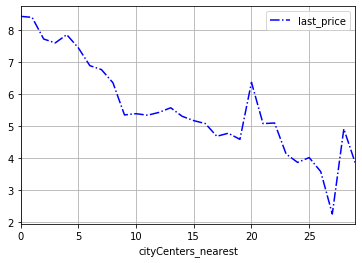

In [97]:
(
pd.DataFrame(df_spb.pivot_table(index='cityCenters_nearest', values='last_price').to_records())
.plot(x='cityCenters_nearest', y='last_price',linestyle='-.', c='b', grid=True)

)
plt.show()

Стоимость падает на 7-8 км. Это и будет ориентиром для центральной зоны.

#### Выделяем сегмент квартир в центре

In [98]:
df_spb_center = df_spb.query('cityCenters_nearest <= 7')
df_spb_center.sample(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,living_total_ratio,kitchen_total_ratio,is_spb
14610,21991,13,5.65,50.1,2016-05-18,2,3.0,7,36.7,другой,...,0.0,NaN,432,0.112774,2,5,2016,0.732535,0.159681,True
12896,19358,2,10.75,105.4,2018-02-10,3,NaN,25,48.7,другой,...,1.0,662.0,90,0.101992,5,2,2018,0.462049,0.123340,True
13083,19651,1,5.30,56.0,2017-12-01,3,NaN,5,39.0,первый,...,1.0,909.0,119,0.094643,4,12,2017,0.696429,0.107143,True
11830,17737,11,7.45,83.7,2016-06-08,4,NaN,6,47.0,другой,...,0.0,NaN,75,0.089008,2,6,2016,0.561529,0.191159,True
2929,4438,16,7.00,67.6,2019-04-25,3,3.0,5,47.0,другой,...,1.0,854.0,95,0.103550,3,4,2019,0.695266,0.118343,True


2503 экземпляра. 
___
#### Проанализируем такие параметры как площадь, цена, число комнат, высота потолков. 



In [99]:
df_spb_center.query(total_area_query)['total_area'].describe()

count    2418.000000
mean       65.019454
std        21.428544
min        12.000000
25%        47.300000
50%        63.350000
75%        80.000000
max       118.000000
Name: total_area, dtype: float64

Средняя площадь 65 метров – как раз для двушек, количество которых превалирует.

Минимально - 12 метров. И такое бывает. Зато в центре.

Квартир с площадью > 80кв.м. целых 25%. Вот она, Пербургская элита.
___
#### Цена

In [100]:
df_spb_center['last_price'].describe()

count    2503.000000
mean        7.502497
std         2.262249
min         1.600000
25%         5.800000
50%         7.400000
75%         9.150000
max        12.000000
Name: last_price, dtype: float64

Если провести параллель с ячейкой выше, которая характеризует площадь, получается всё красиво и логично:

За минимальную цену, предположительно, можно купить минимальную площадь. Так же с максимальными значениями.

Средняя цена 7.5 млн. В Москве, наверное, на порядок выше.
___
#### Количество комнат

In [101]:
df_spb_center.query(rooms_query)['rooms'].describe()

count    2486.000000
mean        2.376508
std         1.038415
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

6 комнат - скорее всего, бывшие коммуналки.

Чаще всего  встречаются двушки и трёшки.
___
#### Высота потолков

In [102]:
df_spb_center.query(ceiling_height_query)['ceiling_height'].describe()

count    1253.000000
mean        2.878101
std         0.213351
min         2.500000
25%         2.700000
50%         2.900000
75%         3.000000
max         3.200000
Name: ceiling_height, dtype: float64

Средняя высота потолков 2.89. 

Кто не видел эти высокие Петербургские потолки в домах старого фонда?
___

### Факторы, влияющие на стоимость квартиры

Проанализируем число комнат, этаж, удалённость от центра, дату размещения объявления и их корреляцию с ценой:

In [103]:
# в центре

l = [
    'last_price',
    'cityCenters_nearest',
    'total_area',
    'rooms',
    'ceiling_height',
    'day_exposition',
    'month_exposition',
    'year_exposition'
]

corr = df_spb_center[l].corr().sort_values('last_price', ascending=False)
corr.style.background_gradient(cmap='coolwarm')

,last_price,cityCenters_nearest,total_area,rooms,ceiling_height,day_exposition,month_exposition,year_exposition
last_price,1,-0.181685,0.695695,0.493181,0.113483,0.0158823,-0.0280508,-0.0143045
total_area,0.695695,-0.226819,1,0.80803,0.112158,-0.0110048,-0.00684414,-0.12536
rooms,0.493181,-0.204685,0.80803,1,0.049838,-0.0247526,-0.00898086,-0.0858908
ceiling_height,0.113483,-0.142816,0.112158,0.049838,1,0.0018246,-0.0110729,0.006988
day_exposition,0.0158823,0.0139259,-0.0110048,-0.0247526,0.0018246,1,0.0347691,0.000844864
year_exposition,-0.0143045,0.0511254,-0.12536,-0.0858908,0.006988,0.000844864,-0.228564,1
month_exposition,-0.0280508,-0.0038389,-0.00684414,-0.00898086,-0.0110729,0.0347691,1,-0.228564
cityCenters_nearest,-0.181685,1,-0.226819,-0.204685,-0.142816,0.0139259,-0.0038389,0.0511254


In [104]:
# не в центре

df_spb_not_center = df_spb.query('cityCenters_nearest > 7')
corr = df_spb_not_center[l].corr().sort_values('last_price', ascending=False)
corr.style.background_gradient(cmap='coolwarm')

,last_price,cityCenters_nearest,total_area,rooms,ceiling_height,day_exposition,month_exposition,year_exposition
last_price,1,-0.126227,0.80704,0.502252,0.0672875,-0.0135442,-0.00149832,0.059907
total_area,0.80704,0.00175663,1,0.787243,0.0510294,-0.0102406,0.00593269,-0.0467502
rooms,0.502252,-0.0325631,0.787243,1,-0.002457,-0.00235539,-0.00632512,-0.0215542
ceiling_height,0.0672875,-0.0318523,0.0510294,-0.002457,1,-0.0105782,-0.0129931,-0.00565456
year_exposition,0.059907,0.00963211,-0.0467502,-0.0215542,-0.00565456,-0.00207384,-0.284855,1
month_exposition,-0.00149832,0.0212535,0.00593269,-0.00632512,-0.0129931,-0.00481692,1,-0.284855
day_exposition,-0.0135442,-0.0206867,-0.0102406,-0.00235539,-0.0105782,1,-0.00481692,-0.00207384
cityCenters_nearest,-0.126227,1,0.00175663,-0.0325631,-0.0318523,-0.0206867,0.0212535,0.00963211


Глобально картина в центре и вне центра схожа.

В центре `cityCenters_nearest` больше влияет на цену, `total_area` и количество квартир `rooms` чуть лучше определяет цену вне центра, а `ceiling_height` может влиять на цену в центре.

В целом, больше остальных влияют:

- общая площадь
- высота комнат
___
#### Этажи: центр / не центр

In [105]:
# центр
df_spb_center.pivot_table(index='floor', values='last_price').sort_values(by='last_price')

,last_price
floor,
первый,6.394663
последний,7.604863
другой,7.699716


In [106]:
# не центр
df_spb_not_center.pivot_table(index='floor', values='last_price').sort_values(by='last_price')

,last_price
floor,
первый,4.779131
последний,5.076375
другой,5.426984


То же, что и раньше: дешевле всего - первый, за ним - последний и дороже всего "другой"

### Шаг 5. Общий вывод

В общем и целом:

Апартаменты дешевле, чем квартиры.

Недвижимость в Санкт-Петербурге стоит дороже, чем за его пределами. Но и там находятся дорогие экземпляры.

Самый дорогой сегмент - недвижимость в центре Петербурга, ближе к центру – дороже.

Факторы, влияющие на стоимость больше всего:
- общая площадь
- кол-во комнат

Для всего набора данных наблюдается тенденция "первый этаж – дешевле всего; последний – немного дороже; средние этажи – самые дорогие".

В датасете много пропусков и выбросов, но не смотря на это, всё получилось и некоторые величины имеют распределение, похожее на нормальное или Пуассоновское. Это – хороший знак.


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод